In [9]:
import numpy as np
import torch
import random
from matplotlib import pylab as plt
from IPython.display import clear_output
from random import choice
width=5
height=5
area=np.array([0])
box=np.zeros([height,width])
boxtoput=np.zeros([height,width])

print(box)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [10]:

L1 = width*height*2 #輸入層的寬度
L2 = 150 #第一隱藏層的寬度
L3 = 100 #第二隱藏層的寬度
L4 = width*height+1 #輸出層的寬度

model = torch.nn.Sequential(
    torch.nn.Linear(L1, L2), #第一隱藏層的shape
    torch.nn.ReLU(),
    torch.nn.Linear(L2, L3), #第二隱藏層的shape
    torch.nn.ReLU(),
    torch.nn.Linear(L3,L4) #輸出層的shape
)
loss_fn = torch.nn.MSELoss() #指定損失函數為MSE（均方誤差）
learning_rate = 1e-3  #設定學習率
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) #指定優化器為Adam，其中model.parameters會傳回所有要優化的權重參數

gamma = 0.9 #折扣因子
epsilon = 1.0

In [23]:
f=open('/content/2-1.txt','r')
number=f.read(1)
number=int(number)
rectangle=np.ones([number,2])
rectangle = rectangle.astype(int)
for _ in range(number):
  line=f.read(1)
  rectangle[_][0] = int(f.read(1))
  space=f.read(1)
  rectangle[_][1] = int(f.read(1))
print(rectangle)

[[2 2]
 [3 2]
 [1 3]
 [4 3]]


In [12]:
def if_method_ok(i,thearray):
  if i==width*height:
    return True
  for j in range(int(i/width),int(i/width+thearray[0])):
    for k in range(int(i%width),int(i%width+thearray[1])):
      if j>=height or k>=width:
        return False
      elif box[j][k]!=0:
        return False
  return True


In [13]:
def puttherecin(i,box,therectangle):
  if i==width*height:
      nop=0#print("diacard")
  else:
    for l in range(int(i/width),int(i/width+therectangle[0])):
      for k in range(int(i%width),int(i%width+therectangle[1])):
        box[l][k]=1
    print(box)


In [14]:
def calreward(i):
  if i==width*height:
    return -5


    area=thearea(i%width,int(i/width))
    compactness=thecompact(i%width,int(i/width))

    return area*compactness
  else:
    area=thearea(i%width,int(i/width))
    compactness=thecompact(i%width,int(i/width))

    return area*compactness

In [15]:
def thecompact(x,y):
  tempbox=np.zeros([height,width])
  tempbox[y][x]=1
  left=width+1
  right=-1
  up=height+1
  down=-1
  area=0
  for _ in range(25):
    for i in range(height):
      for j in range(width):
        if i>0 and tempbox[i-1][j]==1 and box[i][j]==1:
          tempbox[i][j]=1
        elif j>0 and tempbox[i][j-1]==1 and box[i][j]==1:
          tempbox[i][j]=1
        elif i<(height-1) and tempbox[i+1][j]==1 and box[i][j]==1:
          tempbox[i][j]=1
        elif j<(width-1) and tempbox[i][j+1]==1 and box[i][j]==1:
          tempbox[i][j]=1
  for i in range(height):
    for j in range(width):
      if tempbox[i][j]==1:
        area+=1
        if j<left:
          left=j
        if j>right:
          right=j
        if i<up:
          up=i
        if i>down:
          down=i
  square=(right-left+1)*(down-up+1)
  return area/square


In [16]:
def thearea(x,y):#x y 代表當前的點
  tempbox=np.zeros([height,width])
  tempbox[y][x]=1
  area=0
  for _ in range(25):
    for i in range(height):
      for j in range(width):
        if i>0 and tempbox[i-1][j]==1 and box[i][j]==1:
          tempbox[i][j]=1
        elif j>0 and tempbox[i][j-1]==1 and box[i][j]==1:
          tempbox[i][j]=1
        elif i<(height-1) and tempbox[i+1][j]==1 and box[i][j]==1:
          tempbox[i][j]=1
        elif j<(width-1) and tempbox[i][j+1]==1 and box[i][j]==1:
          tempbox[i][j]=1
  for i in range(height):
    for j in range(width):
      if tempbox[i][j]==1:
        area+=1
  return area

In [17]:
def expand(i):
  for p in range(rectangle[i][0]):
    for j in range(rectangle[i][1]):
      boxtoput[p][j]=1
  return

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]]

Text(0, 0.5, 'reward')

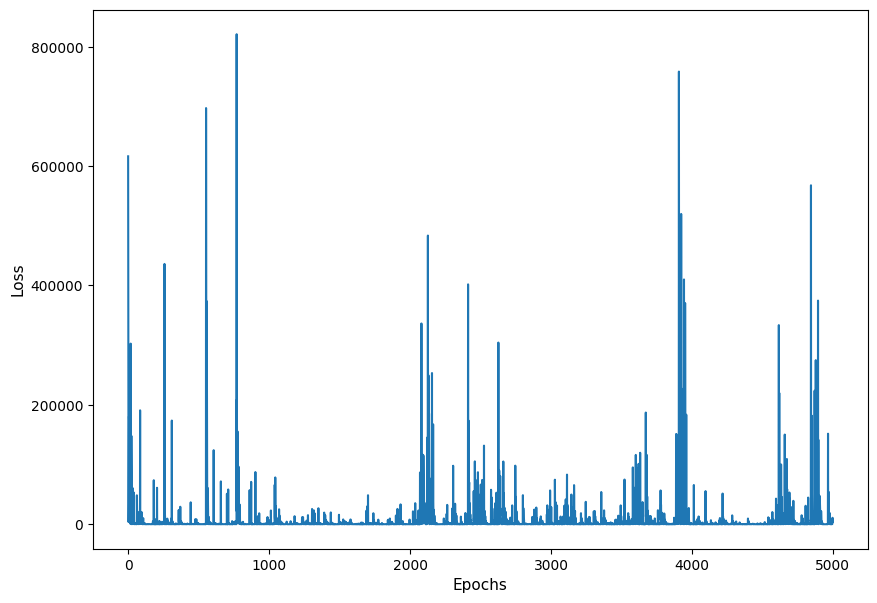

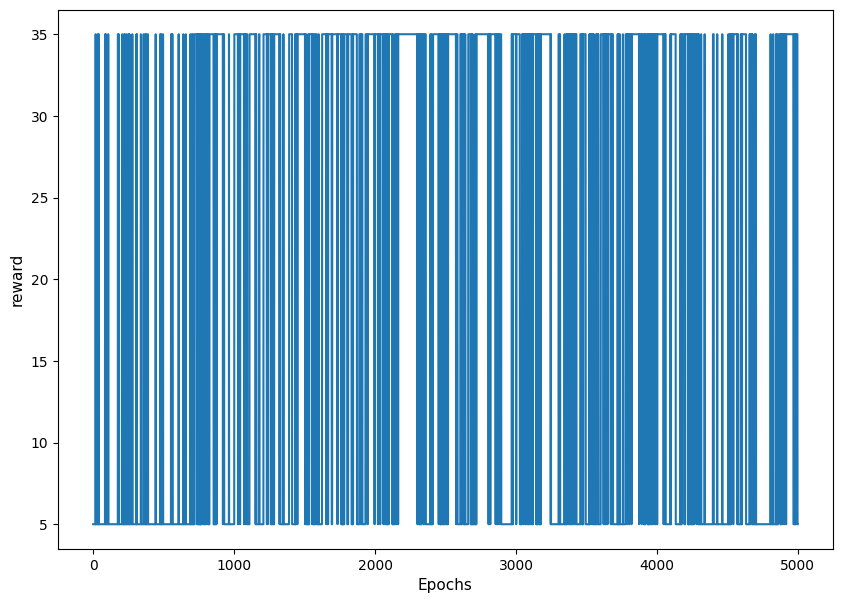

In [22]:
epochs = 5000
losses = [] #使用串列將每一次的loss記錄下來，方便之後將loss的變化趨勢畫成圖
rewards=[]
for i in range(epochs):

  box=np.zeros([height,width])
  totalreward=0
  for j in range(number):

    boxtoput=np.zeros([height,width])
    expand(j)
    state1=torch.from_numpy(box).float()

    state10=torch.from_numpy(boxtoput).float()
    state1=state1.reshape(1, -1)
    state10=state10.reshape(1, -1)
    state1=torch.cat((state1,state10),dim=1)

    qval = model(state1) #執行Q網路，取得所有動作的預測Q值
    qval_ = qval.data.numpy() #將qval轉換成NumPy陣列
    if (random.random() < epsilon):
      ifokornot=False
      thecount=0
      torandom=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
      while ifokornot==False and thecount<25:
        ln=len(torandom)
        action_ = torandom[random.randint(0,ln-1)] #隨機選擇一個動作（探索）
        ifokornot=if_method_ok(action_,rectangle[j])
        torandom.remove(action_)
        thecount+=1
      if ifokornot==False:
        action_=25
    else:

      qval2=np.zeros([1,26])
      for u in range(25):
        if if_method_ok(u,rectangle[j])==False:
          qval2[0][u]=-5000
        else :
          qval2[0][u]=qval_[0][u]
      qval2[0][25]=-4000
      action_ = np.argmax(qval2) #選擇Q值最大的動作（探索）


    #if ifok:
    reshapebox=box.flatten()
    puttherecin(action_,box,rectangle[j])

    state2_ = reshapebox + np.random.rand(1,width*height)/10.0
    state2 = torch.from_numpy(state2_).float() #動作執行完畢，取得遊戲的新狀態並轉換成張量
    reward =calreward(action_)
    totalreward+=reward
    with torch.no_grad():
      state2=torch.cat((state2,state10),dim=1)
      newQ = model(state2)

      newQ2=np.zeros([1,26])
      for u in range(25):
        if if_method_ok(u,rectangle[j])==False:
          newQ2[0][u]=-5000
        else :
          newQ2[0][u]=newQ[0][u]
      newQ2[0][25]=-4000
      newQ2=torch.from_numpy(newQ2).float()
    maxQ = torch.max(newQ2) #將新狀態下所輸出的Q值向量中的最大值給記錄下來
    if j<number-1:
      Y = reward + (gamma * maxQ)  #計算訓練所用的目標Q值
    else:
      Y = reward
    Y = torch.Tensor([Y]).detach()

    X = qval.squeeze()[action_] #將演算法對執行的動作所預測的Q值存進X，並使用squeeze()將qval中維度為1的階去掉 (shape[1,4]會變成[4])

    loss = loss_fn(X, Y) #計算目標Q值與預測Q值之間的誤差
    if i%100 == 0:
      print(i, loss.item())
      clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(box)
  rewards.append(totalreward)
  losses.append(loss.item())
  if epsilon > 0.1:
    epsilon -= (1/epochs) #讓ε的值隨著訓練的進行而慢慢下降，直到0.1（還是要保留探索的動作）
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epochs",fontsize=11)
plt.ylabel("Loss",fontsize=11)
plt.figure(figsize=(10,7))
plt.plot(rewards)
plt.xlabel("Epochs",fontsize=11)
plt.ylabel("reward",fontsize=11)

In [19]:

box=np.zeros([height,width])

for j in range(number):
  boxtoput=np.zeros([height,width])
  expand(j)
  state1=torch.from_numpy(box).float()
  state10=torch.from_numpy(boxtoput).float()
  state1=state1.reshape(1, -1)
  state10=state10.reshape(1, -1)
  state1=torch.cat((state1,state10),dim=1)
  qval = model(state1) #執行Q網路，取得所有動作的預測Q值
  qval_ = qval.data.numpy() #將qval轉換成NumPy陣列
  qval2=np.zeros([1,26])
  for u in range(25):
    if if_method_ok(u,rectangle[j])==False:
      qval2[0][u]=-5000
    else :
      qval2[0][u]=qval_[0][u]
      qval2[0][25]=-4000
  action_ = np.argmax(qval2) #

  reshapebox=box.flatten()
  state2_ = reshapebox + np.random.rand(1,width*height)/10.0
  state2 = torch.from_numpy(state2_).float() #動作執行完畢，取得遊戲的新狀態並轉換成張量
  puttherecin(action_,box,rectangle[j])


  with torch.no_grad():
    state2=torch.cat((state2,state10),dim=1)
    newQ = model(state2)
  maxQ = torch.max(newQ)
  X = qval.squeeze()[action_]
  state1 = state2
print(box)



[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1.]]
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1.]]
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1.]]
[[0. 0. 0. 1. 1.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1.]]
[[0. 0. 0. 1. 1.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1.]]
